In [173]:
%matplotlib inline
import numpy as np
import numpy.ma as ma
import glob
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from PIL import Image
import corner
from scipy import signal
from scipy import misc

In [262]:
def load(name):
    i = np.array(Image.open(name))
    yfac = float(i.shape[0])/float(i.shape[1])
    fac = 500
    #i_down = scipy.signal.decimate(scipy.signal.decimate(i,fac,axis=1),fac,axis=0)
    i_down = scipy.signal.resample(scipy.signal.resample(i,fac,axis=1),int(fac*yfac),axis=0)
    i_mono = np.sum(i_down,axis=2)
    return i_mono


In [263]:
images = []
for i in range(3,53):
    images.append(load("20160902_yzboo_run2/20160902_%04d.jpg"%i))

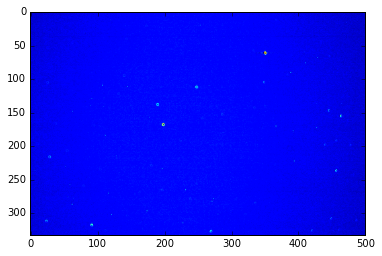

In [264]:
plt.imshow(images[2])

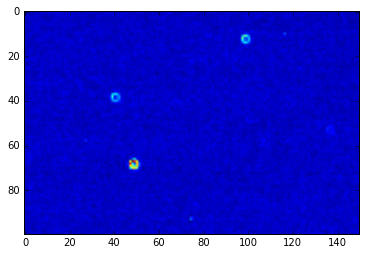

In [265]:
tx, ty = 2*75, 2*50
tw, th = 2*75, 2*50
template = images[0][ty:ty+th,tx:tx+tw]
plt.imshow(template)

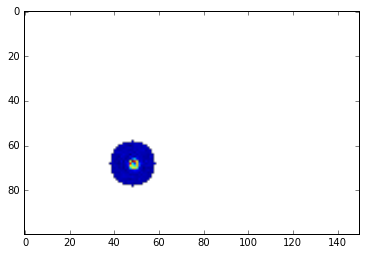

In [266]:
def getMask(x,y,r=10.):
    mask = np.zeros(template.shape)
    for i in range(template.shape[0]):
        for j in range(template.shape[1]):
            dj = x-j
            di = y-i
            if dj*dj+di*di>r*r:
                mask[i,j] = 1
    return mask
mask_zy_boo = getMask(2*24,2*34)
mask_ref1 = getMask(2*20,2*19)
mask_ref2 = getMask(2*49,2*6)
mask_dark = getMask(70,2*30)
mp = ma.masked_array(template,mask_zy_boo)
plt.imshow(mp)

In [233]:
def findshift(pic):
    corr = signal.correlate2d(pic, template, mode="valid")
    y, x = np.unravel_index(np.argmax(corr), corr.shape)  # find the match
    return x, y

In [ ]:
pos = np.zeros((len(images),2))
for n,i in enumerate(images):
    x,y = findshift(i)
    pos[n][0] = x
    pos[n][1] = y

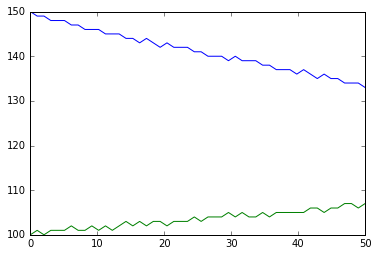

In [307]:
plt.plot(times,pos[:,0])
plt.plot(times,pos[:,1])

In [302]:
fluxes = np.zeros((len(images),4))
for n,i in enumerate(images):
    x,y = [int(k) for k in pos[n]]
    fluxes[n][0] = np.sum(ma.masked_array(i[y:y+th,x:x+tw],mask_zy_boo))
    fluxes[n][1] = np.sum(ma.masked_array(i[y:y+th,x:x+tw],mask_ref1))
    fluxes[n][2] = np.sum(ma.masked_array(i[y:y+th,x:x+tw],mask_ref2))
    fluxes[n][3] = np.sum(ma.masked_array(i[y:y+th,x:x+tw],mask_dark))

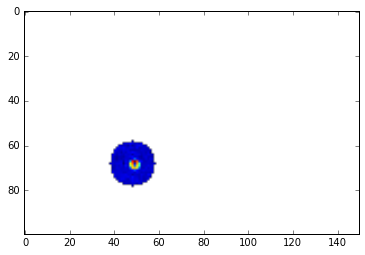

In [281]:
x,y = [int(k) for k in pos[-1]]
mp = ma.masked_array(images[-1][y:y+th,x:x+tw],mask_zy_boo)
plt.imshow(mp)

In [268]:
times = np.linspace(0,len(images))

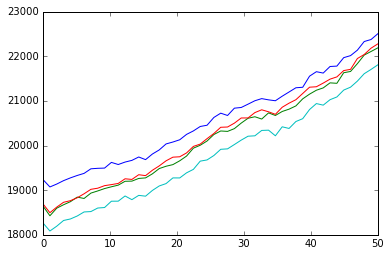

In [303]:
yzboo = fluxes[:,0]-fluxes[:,3]
ref = fluxes[:,1]+fluxes[:,2]-2.*fluxes[:,3]
plt.plot(times,fluxes[:,0])
plt.plot(times,fluxes[:,1])
plt.plot(times,fluxes[:,2])
plt.plot(times,fluxes[:,3])

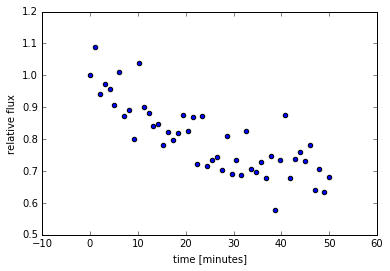

In [306]:
ax = plt.scatter(times,(yzboo/ref)/(yzboo[0]/ref[0]))
plt.ylabel("relative flux")
plt.xlabel("time [minutes]")

In [273]:
maxepoch = 2448500.00300
period = 0.1040920000

In [274]:
today = 2457634.595833

In [276]:
(today-maxepoch)/period

87754.99397648012

In [279]:
maxepoch + 87755 * period- today

0.0006270003505051136